1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.

Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

The first step is to ensure all relevant packages have been imported

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [131]:
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

Here, I am reading the csv file into a dataframe called df from the local computer

In [132]:
df = pd.read_csv('/Users/shubhangimallik/Downloads/kc_house_data.csv')

The following few lines of code is necessary for exploring this dataset before I start working on it to build a model

In [133]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [134]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [136]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [137]:
df['date'] = pd.to_datetime(df['date'])

Through the above code, the 'date' column in the DataFrame 'df' will be converted to a datetime format, which will allow us to  perform various operations and calculations on the dates more easily.

The following graphs have been plotted to see if the data is normally distributed or not spcifically for price, date, bathrooms and bedrooms

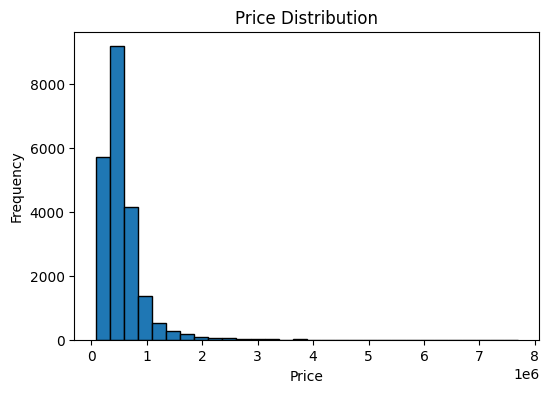

In [139]:
# Plotting the histogram of the price column
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

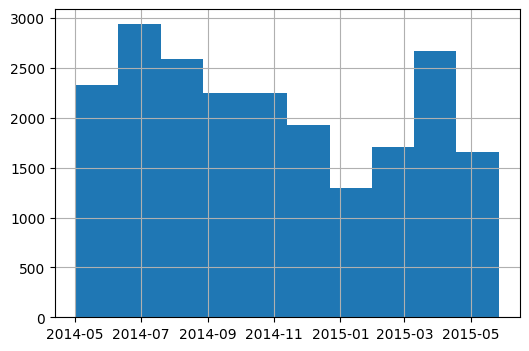

In [140]:
df['date'].hist(figsize = (6,4))
plt.show()

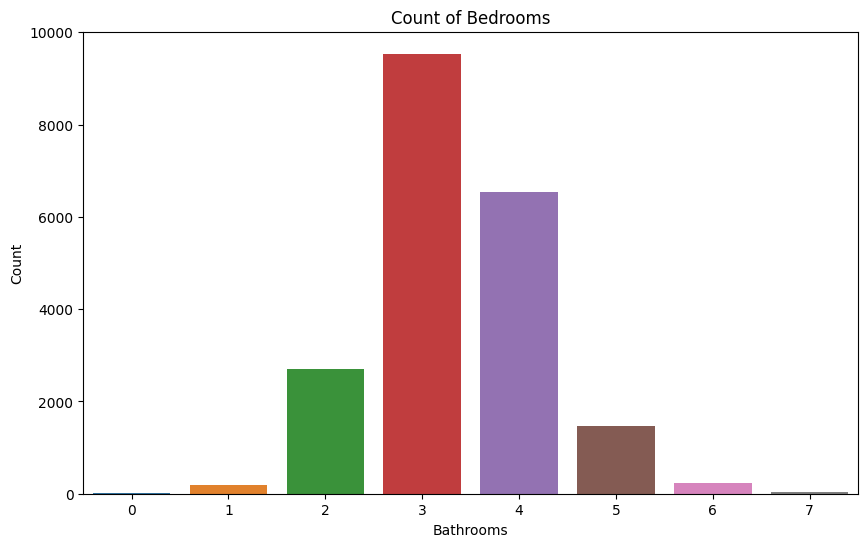

In [185]:
bedroom_counts = df['bedrooms'].value_counts()

# Create a bar plot of bathroom counts
plt.figure(figsize=(10, 6))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values)

# Set plot title and labels
plt.title('Count of Bedrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')

# Show plot
plt.show()

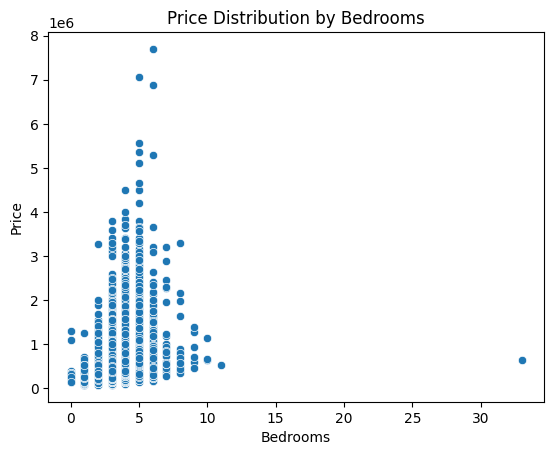

In [142]:
sns.scatterplot(data = df,x='bedrooms', y='price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')

plt.show()

It seems like there can be some outliers here. However, before removing any outliers, we have to be careful as we do not want to lose a lot of data

Here, I'm checking how many houses have more than 10 bedrooms

In [143]:
df[(df['bedrooms'] >= 10)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [144]:
df_copy= df[(df['zipcode'] == 98103)]

In [145]:
df_copy.groupby('zipcode')[['bedrooms','price', 'sqft_living','grade']].median()

,bedrooms,price,sqft_living,grade
zipcode,,,,
98103,3.0,550000.0,1505.0,7.0


In [146]:
df_copy.groupby('zipcode')[['bedrooms','price', 'sqft_living','grade']].median()

,bedrooms,price,sqft_living,grade
zipcode,,,,
98103,3.0,550000.0,1505.0,7.0


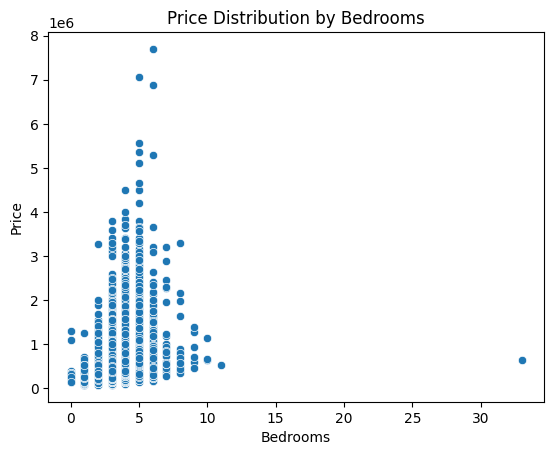

In [147]:
sns.scatterplot(data = df,x='bedrooms', y='price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')

plt.show()

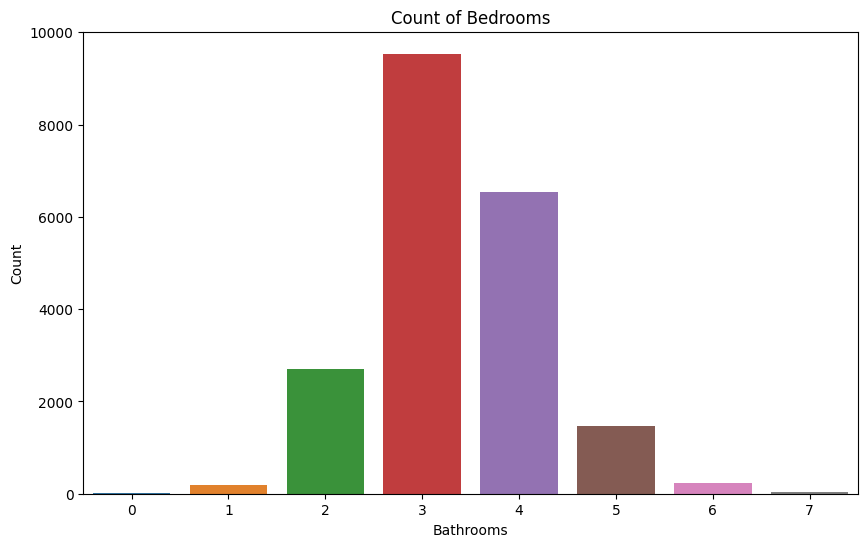

In [186]:
bedroom_counts = df['bedrooms'].value_counts()

# Create a bar plot of bathroom counts
plt.figure(figsize=(10, 6))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values)

# Set plot title and labels
plt.title('Count of Bedrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')

# Show plot
plt.show()

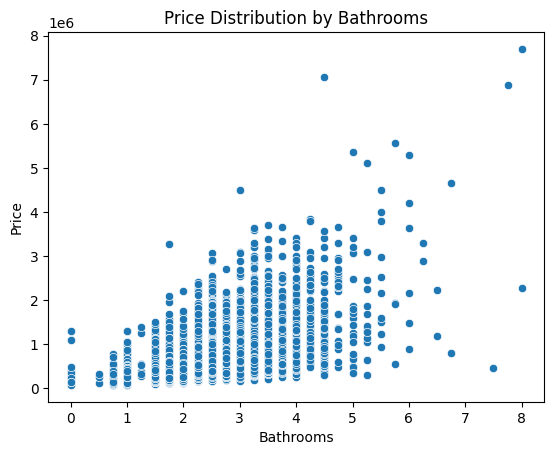

In [149]:
# Create a box plot
sns.scatterplot(data = df,x='bathrooms', y='price')
# Set labels and title
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')

# Display the plot
plt.show()

In the above graph, it seems that there are fewer houses with more than 7 bathrooms

In [150]:
df[(df['bathrooms'] >= 7)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8546,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


I am dropping the houses with more than 7 bathrooms as these might affect our model later on

In [151]:
df = df.drop(df[df['bathrooms'] >= 7].index)

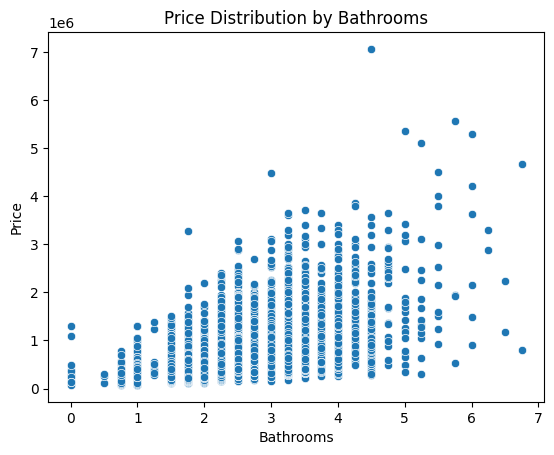

In [152]:
# Create a box plot
sns.scatterplot(data = df,x='bathrooms', y='price')
# Set labels and title
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')

# Display the plot
plt.show()

The above plot has a better distribution than before so dropping the houses with more than 7 bathrooms affected out overall dataset positively

In the followng few lines of code, I have plotted more graphs to go through the data more thoroughly

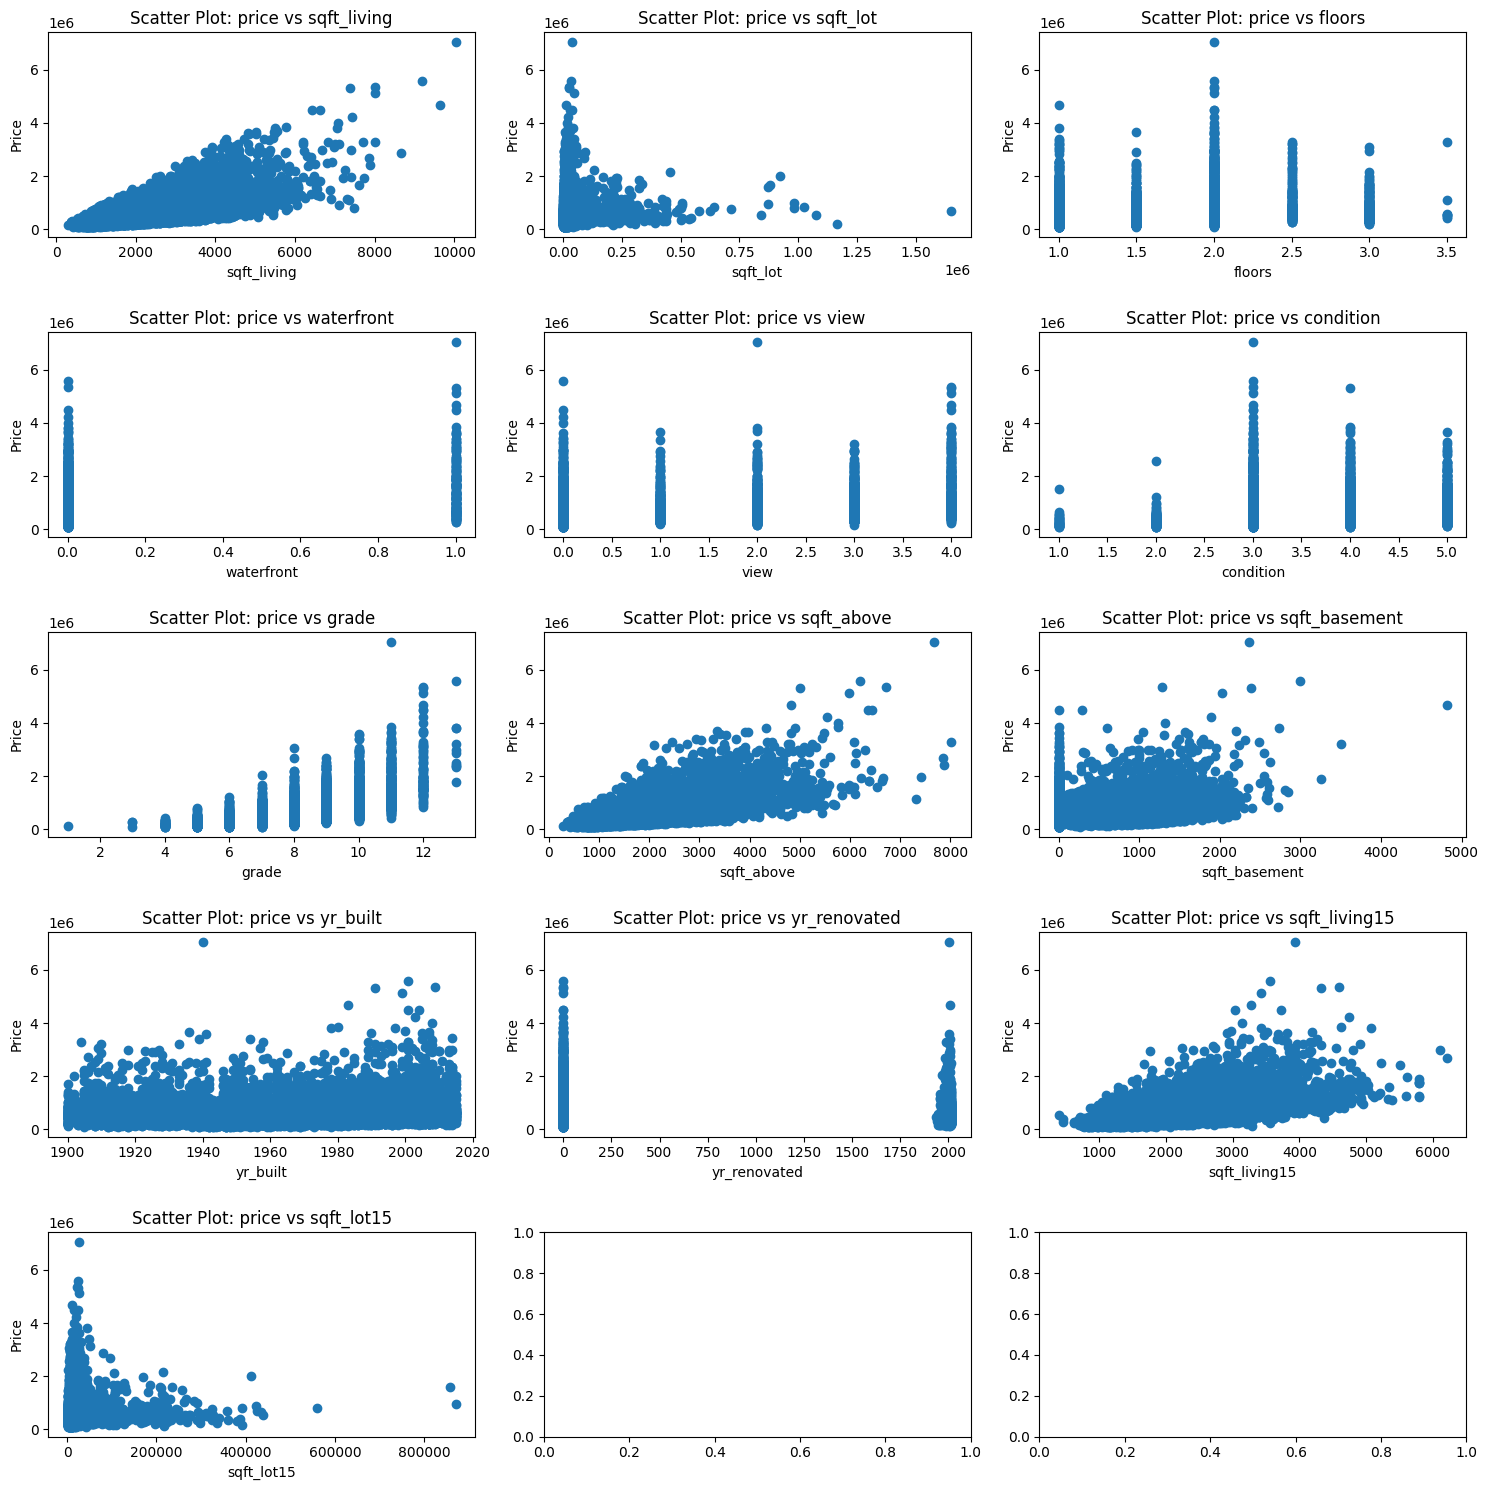

In [153]:
import matplotlib.pyplot as plt

def plot_scatter(df, column, ax):
    ax.scatter(df[column], df['price'])
    ax.set_title(f"Scatter Plot: price vs {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Price")

columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']

num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    plot_scatter(df, column, axs[row, col])

plt.tight_layout()

plt.show()

<Axes: >

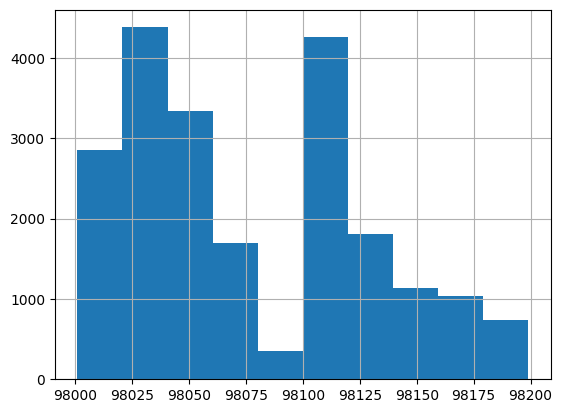

In [154]:
df["zipcode"].hist()

<Axes: xlabel='lat', ylabel='long'>

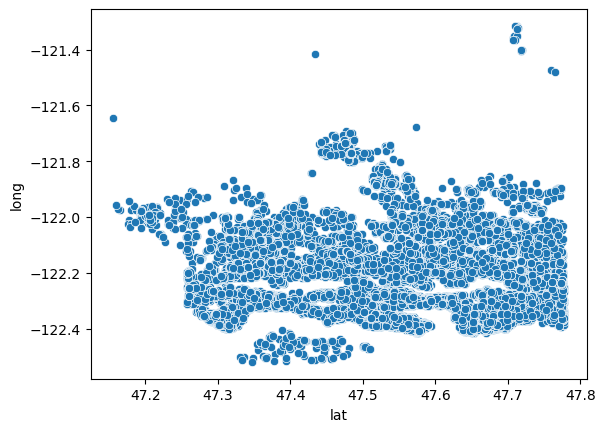

In [155]:
sns.scatterplot(data = df, x = "lat", y = "long")

Since, the data seems to be normally distributed, we can use z-score to remove outliers. This will ensure that we use a clean dataset while building our model

In [156]:
def remove_outliers(df):
    variables = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (4*df[variable].std())]
        
    return df

In [157]:
df = remove_outliers(df)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20710 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20710 non-null  int64         
 1   date           20710 non-null  datetime64[ns]
 2   price          20710 non-null  float64       
 3   bedrooms       20710 non-null  int64         
 4   bathrooms      20710 non-null  float64       
 5   sqft_living    20710 non-null  int64         
 6   sqft_lot       20710 non-null  int64         
 7   floors         20710 non-null  float64       
 8   waterfront     20710 non-null  int64         
 9   view           20710 non-null  int64         
 10  condition      20710 non-null  int64         
 11  grade          20710 non-null  int64         
 12  sqft_above     20710 non-null  int64         
 13  sqft_basement  20710 non-null  int64         
 14  yr_built       20710 non-null  int64         
 15  yr_renovated   20710 non

It seems we have lost approximately 4% of our total dataset. This is an acceptable loss as ultimately our goal is to have a clean dataset for modelling

Here, I'm plotting the same graphs again to see if there is any issues after the dataset has been cleaned

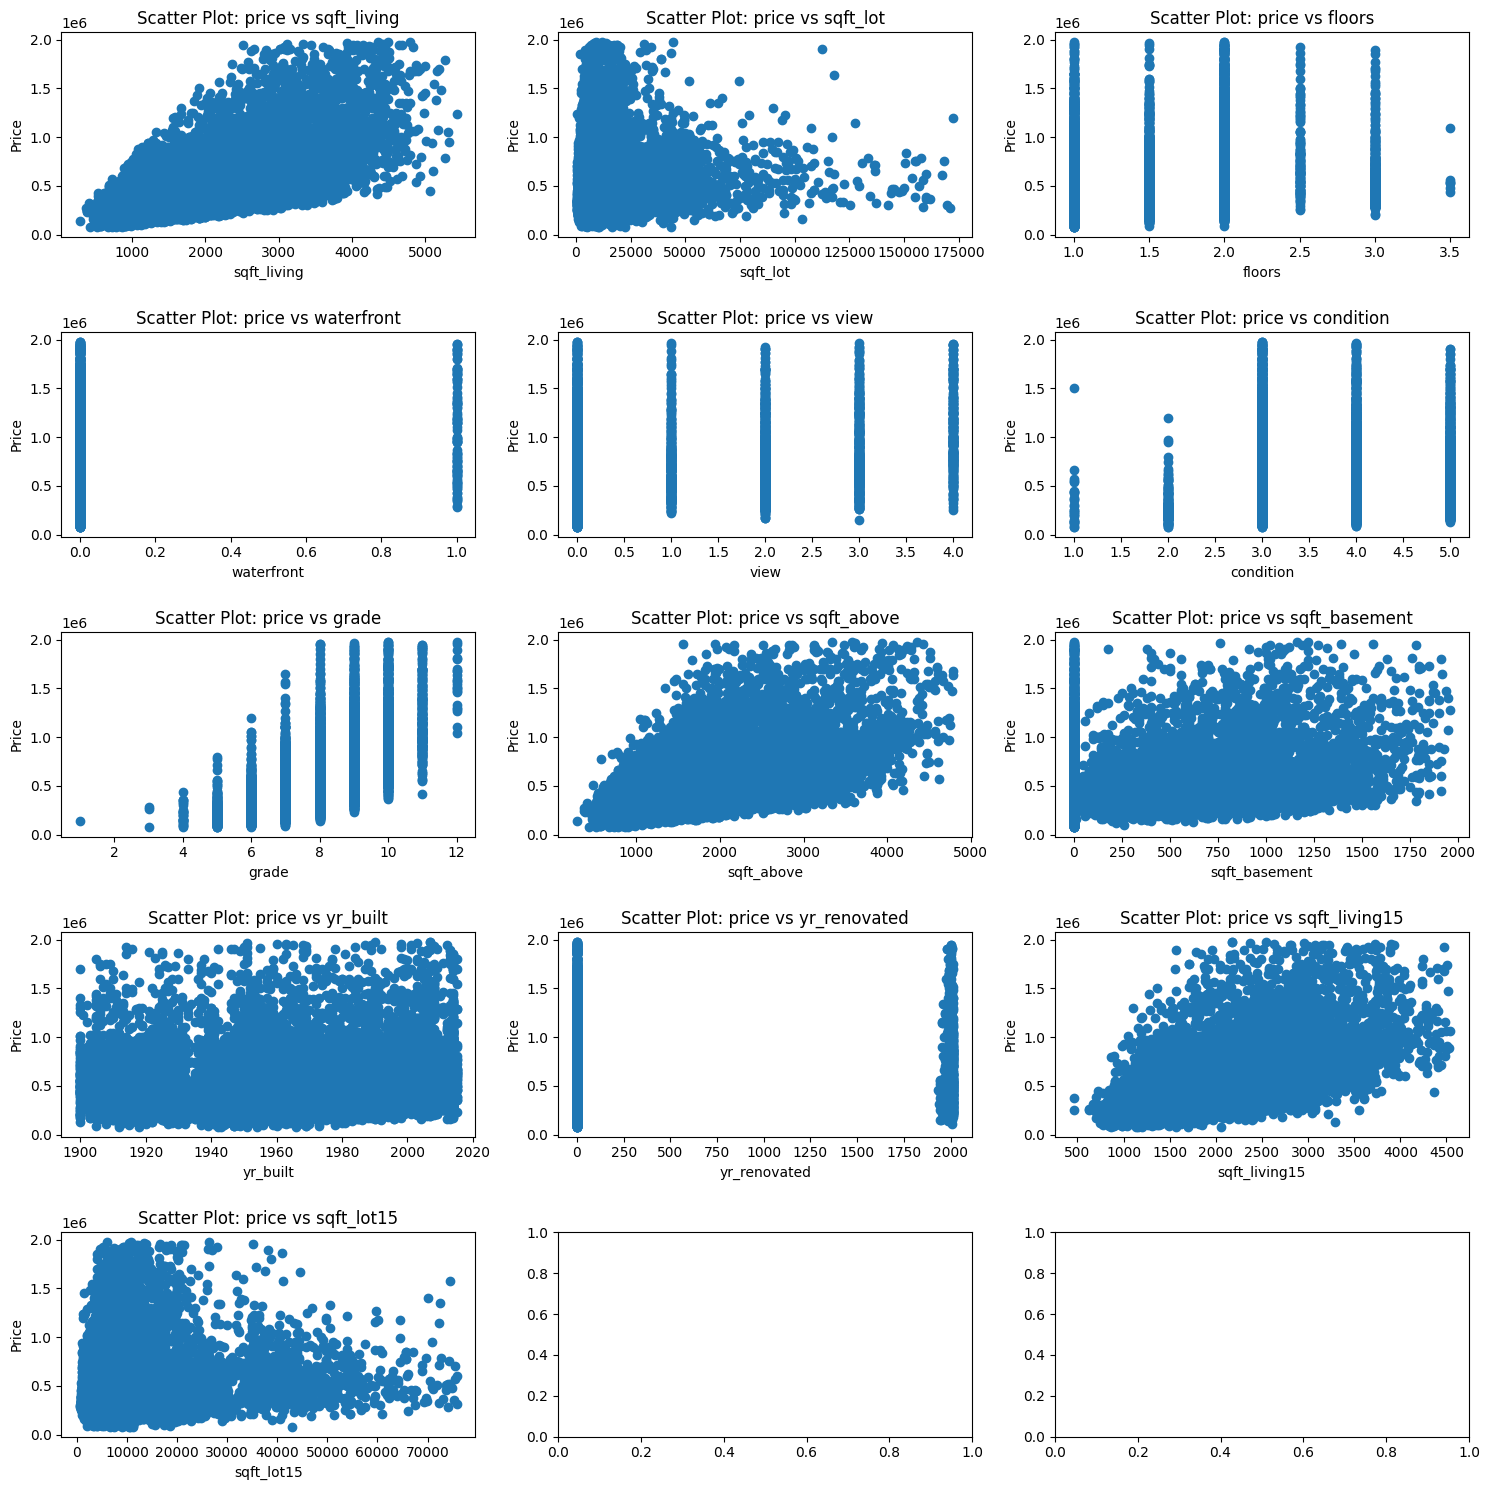

In [159]:
import matplotlib.pyplot as plt

def plot_scatter(df, column, ax):
    ax.scatter(df[column], df['price'])
    ax.set_title(f"Scatter Plot: price vs {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Price")

columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']

num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    plot_scatter(df, column, axs[row, col])

plt.tight_layout()

plt.show()

In the following lines of code, I am creating new variables like price_per_sqft, house_age, month, and year. I decided on these new variables after a few trials and it seems like these new variables can be used effectively for building a predicitve model

In [160]:
df['price_per_sqft'] = df.groupby('zipcode')['price'].transform(lambda x: x / df['sqft_living'])
df['month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

In [161]:
# Calculate the age of the house and create a new variable 'house_age'
df['house_age'] = (df['Year'] - df['yr_built'])

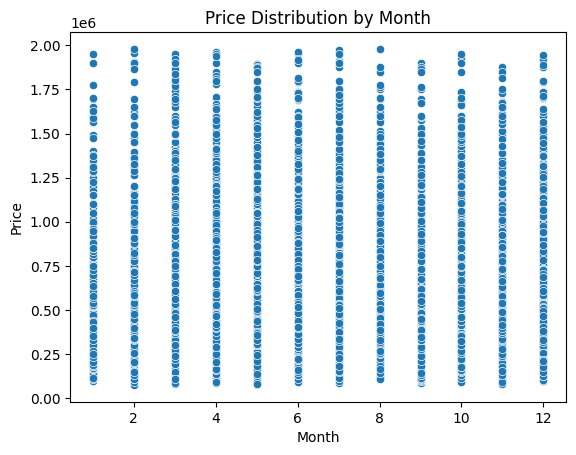

In [162]:
# Create a box plot
sns.scatterplot(data = df,x='month', y='price')
# Set labels and title
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price Distribution by Month')

# Display the plot
plt.show()

In [163]:
Y = df.iloc[:, df.columns.get_loc('price')]

X = df.iloc[:, df.columns != 'price']

Through the above code, Y will contain the 'price' column, and X will contain all the remaining columns

In [164]:
X.drop(columns=['date','id'], inplace=True)

/var/folders/gt/w3wx215x3cz608s_pxx7zkpr0000gn/T/ipykernel_4681/3338808530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['date','id'], inplace=True)


After executing this code, the columns 'date' and 'id' will be removed from the DataFrame X, and the modifications will be applied to X itself.





In [165]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

X_train: The training set containing a subset of the columns from the original X DataFrame.
X_test: The test set containing a subset of the columns from the original X DataFrame.
y_train: The training set of the 'price' column from the original Y DataFrame.
y_test: The test set of the 'price' column from the original Y Dataframe

In the following code block, I have used Linear regression. After executing this code, the regressor object will have learned from the training data and be ready to make predictions on new, unseen data.

In [166]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train) 

LinearRegression()

In [167]:
y_pred= regressor.predict(X_test)#predicting the value of dependent variables with the help of independent variable

In [168]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

82187.83046441888

The calculated RMSE value is approximately 82187.83046441888. The RMSE provides an estimate of the average prediction error, and in this case, it represents the average difference between the predicted values and the actual values on the test set.

The lower the RMSE value, the better the model's performance, as it indicates that the predicted values are closer to the actual values.

As discussed in class, an RMSE value of less than 100k is acceptable for this dataset

In [184]:
r2 = regressor.score(X_test, y_test)
print("R-squared value for Linear Regression model:", r2)

R-squared value for Linear Regression model: 0.9088709437951623


Next, I will try the OLS method to see how the results differ

I have tried out multiple combination of variables

In [169]:
results = ols("price ~ bedrooms + bathrooms + sqft_living + waterfront +view + condition + grade + sqft_above + sqft_basement + yr_renovated + zipcode + lat + long + sqft_living15 + price_per_sqft + house_age ", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.403e+04
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:48:26   Log-Likelihood:            -2.6383e+05
No. Observations:               20710   AIC:                         5.277e+05
Df Residuals:                   20694   BIC:                         5.278e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.777e+06   1.18e+06      6.

 In this case, the R-squared value is 0.910, which means that approximately 91% of the variability in the 'price' can be explained by the independent variables in the model.

In [170]:
y_pred = results.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

82075.48097746503


As discussed in class, an RMSE value of less than 100k is acceptable for this dataset

In the following code block I have also tried out the Ridge model

In [171]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)

In [172]:
clf.fit(X_train, y_train)

Ridge()

In [173]:
y_pred= clf.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

82190.54668664973


As discussed in class, an RMSE value of less than 100k is acceptable for this dataset

In [181]:
r2 = clf.score(X_test, y_test)
print("R-squared value for Ridge model:", r2)


R-squared value for Ridge model: 0.9088649202547624


In the following code block, I have tried the LASSO method to build a model

In [174]:
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.435e+13, tolerance: 1.267e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [175]:
y_pred= model.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

82188.67087670793


As discussed in class, an RMSE value of less than 100k is acceptable for this dataset

In [182]:
r2 = model.score(X_test, y_test)
print("R-squared value for Lasso model:", r2)

R-squared value for Lasso model: 0.9055468859382083


In the following method I have used the ElasticNet method to build a model

In [176]:
# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.910e+13, tolerance: 1.267e+11
  model = cd_fast.enet_coordinate_descent(


83673.36225622855


As discussed in class, an RMSE value of less than 100k is acceptable for this dataset

In [183]:
r2 = model.score(X_test, y_test)
print("R-squared value for ElasticNet model:", r2)

R-squared value for ElasticNet model: 0.9055468859382083


RMSE Values for the different models I have used are as follows:-

1. Linear Regression: 82187.83046441888
2. OLS: 82075.48097746503
3. Ridge: 82190.54668664973
4. LASSO: 82188.67087670793
5. ElasticNet: 83673.36225622855

R-sqaured values for the different models I have used are as follows:-

1. Linear Regression: 0.908
2. OLS:  0.910
3. Ridge: 0.908
4. LASSO: 0.905
5. ElasticNet: 0.905

Here, it is evident that based on the RMSE value and R-squared value, OLS is the best model. It has the lowest RMSE value and the highest Rsqaured value. I have explained further why OLS is the best model in the next cell

2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

I have used all the different techniques used in class like Linear Regression, OLS, LASSO, Ridge and ElasticNet. According to my analysis, the best approach is the OLS model. The reasons are below:-

Low RMSE: The OLS model's low RMSE value indicates that it has a smaller average prediction error compared to other models. This suggests that the OLS model provides accurate predictions and performs well in terms of minimizing the differences between predicted and actual values.

Statistical Significance: The OLS model's coefficients have been reported with low p-values (0.000), indicating their statistical significance. This suggests that the estimated coefficients are unlikely to be the result of chance, further supporting the validity of the model.

R-squared and Adjusted R-squared: The model's R-squared and adjusted R-squared values, both reported as 0.911, indicate that approximately 91.1% of the variability in the target variable can be explained by the independent variables. This demonstrates a strong ability of the OLS model to capture the relationships in the data.

Given the extensive data exploration and data cleaning that has been done without significant loss of data and an RMSE value of under 100k which was decided as an acceptable upper limit, this is the best model that can be built


3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?


The coefficient estimates provide insights into the main drivers of house prices in King City and the impact these drivers have on the price. The key drivers are as follows:-

Size of the Property: The size of the property, as measured by the square footage of living space (sqft_living), is a major driver of house prices. For every unit increase in square footage, we observe an increase of approximately $156.69 in the house price. This indicates that larger houses tend to command higher prices.

Property Grade: The grade of the property (grade), which reflects the overall quality and construction of the house, is a significant driver of prices. A one-point increase in the grade results in an increase of about $28,400 in the house price. Higher-grade houses, indicating superior quality and features, command higher prices.

Waterfront Location: Having a waterfront location (waterfront) is a strong positive driver for house prices. A property with a waterfront location contributes approximately $65,840 to the price. Waterfront properties are highly desirable and often associated with premium values due to their scenic and exclusive nature.

View: The presence of a scenic view (view) significantly impacts house prices. Each incremental level increase in the view score contributes approximately $16,180 to the house price. Properties with better views, such as mountain or water views, tend to have higher values due to their aesthetic appeal.

Number of Bedrooms and Bathrooms: The number of bedrooms (bedrooms) and bathrooms (bathrooms) both have a positive impact on house prices. Each additional bedroom contributes approximately $5,568 to the price, while each additional bathroom adds around $11,720. These features signify the size and convenience of the property, influencing its value.

Property Condition: The condition of the property (condition) also affects house prices. A one-point increase in the condition score corresponds to an increase of around $10,830 in the house price. Houses in better condition generally have higher prices, as buyers are willing to pay more for well-maintained properties.

Additionally, features such as the square footage of the above-ground area (sqft_above), square footage of the basement area (sqft_basement), and any renovation (yr_renovated) contribute positively to the house price

